In [1]:
import requests
from tqdm.auto import tqdm
import pandas as pd
import matplotlib

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
sber = '3529'
page = 1
num_per_page = 100
moscow = 1
url = f'https://api.hh.ru/vacancies?employer_id={sber}&per_page={num_per_page}'

In [3]:
res = requests.get(url)
vacancies = res.json()
num_pages = vacancies.get('pages')
num_pages

20

In [4]:
all_vacancy_ids= []
for i in tqdm(range(vacancies.get('pages'))):
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}'
    res = requests.get(url)
    vacancies = res.json()
    vacancy_ids = [el.get('id') for el in vacancies.get('items')]
    all_vacancy_ids.extend(vacancy_ids)

100%|███████████████████████████████████████████| 20/20 [00:12<00:00,  1.56it/s]


In [5]:
# Задание вытащить все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, подумайте как его обойти)
# Вытащите все полные описания этих вакансий по запросу с https://api.hh.ru/vacancies/43326020 где 43326020 id вакансии
# Создайте аналогичный vacancy DataFrame только добавьте поле skills
# Переведите даты публикаций в datetime
# Постройте график опубликованных вакансий по датам
# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
# Найдите те вакансии с использованием python, которые вам интересны
# Определите по полю skills какие навыки больше всего востребованы для этих вакансий, и
# Постройте график наиболее востребованных вакансий

In [6]:
print(len(all_vacancy_ids))
print(all_vacancy_ids[0:5])

2000
['54044500', '53568652', '54366750', '54036425', '54525748']


In [7]:
# Проверим состав получаемых полей
url = f'https://api.hh.ru/vacancies/54162408'

r = requests.get(url)

# Нормализуем для удобства
j = pd.json_normalize(r.json(), max_level=1)

print(j.columns)

Index(['id', 'premium', 'relations', 'name', 'insider_interview',
       'response_letter_required', 'address', 'allow_messages', 'contacts',
       'description', 'branded_description', 'vacancy_constructor_template',
       'key_skills', 'accept_handicapped', 'accept_kids', 'archived',
       'response_url', 'specializations', 'professional_roles', 'code',
       'hidden', 'quick_responses_allowed', 'driver_license_types',
       'accept_incomplete_resumes', 'published_at', 'created_at',
       'negotiations_url', 'suitable_resumes_url', 'apply_alternate_url',
       'has_test', 'test', 'alternate_url', 'working_days',
       'working_time_intervals', 'working_time_modes', 'accept_temporary',
       'billing_type.id', 'billing_type.name', 'area.id', 'area.name',
       'area.url', 'salary.from', 'salary.to', 'salary.currency',
       'salary.gross', 'type.id', 'type.name', 'site.id', 'site.name',
       'experience.id', 'experience.name', 'schedule.id', 'schedule.name',
       'emplo

In [8]:
# Соберем данные по вакансиям
all_vacancy_results=pd.DataFrame(columns=['id', 'premium', 'relations', 'name', 'insider_interview',
       'response_letter_required', 'address', 'allow_messages', 'contacts',
       'description', 'branded_description', 'vacancy_constructor_template',
       'key_skills', 'accept_handicapped', 'accept_kids', 'archived',
       'response_url', 'specializations', 'professional_roles', 'code',
       'hidden', 'quick_responses_allowed', 'driver_license_types',
       'accept_incomplete_resumes', 'published_at', 'created_at',
       'negotiations_url', 'suitable_resumes_url', 'apply_alternate_url',
       'has_test', 'test', 'alternate_url', 'working_days',
       'working_time_intervals', 'working_time_modes', 'accept_temporary',
       'billing_type.id', 'billing_type.name', 'area.id', 'area.name',
       'area.url', 'salary.from', 'salary.to', 'salary.currency',
       'salary.gross', 'type.id', 'type.name', 'site.id', 'site.name',
       'experience.id', 'experience.name', 'schedule.id', 'schedule.name',
       'employment.id', 'employment.name', 'department.id', 'department.name',
       'employer.id', 'employer.name', 'employer.url',
       'employer.alternate_url', 'employer.logo_urls',
       'employer.vacancies_url', 'employer.trusted'])


for i in tqdm(all_vacancy_ids):
    url = f'https://api.hh.ru/vacancies/{i}'
    res = requests.get(url)
    vacancies = pd.json_normalize(res.json())    
    all_vacancy_results = pd.concat([all_vacancy_results, vacancies], join="outer")


100%|███████████████████████████████████████| 2000/2000 [08:07<00:00,  4.10it/s]


In [9]:
# проверим длину полученного датафрейма
print(len(all_vacancy_results))

2000


In [10]:
# переведем в datetime и проверим результат
all_vacancy_results['published_at'] = pd.to_datetime(all_vacancy_results['published_at'])
all_vacancy_results['created_at'] = pd.to_datetime(all_vacancy_results['created_at'])

print(all_vacancy_results.published_at.dtype, all_vacancy_results.created_at.dtype)

datetime64[ns, pytz.FixedOffset(180)] datetime64[ns, pytz.FixedOffset(180)]


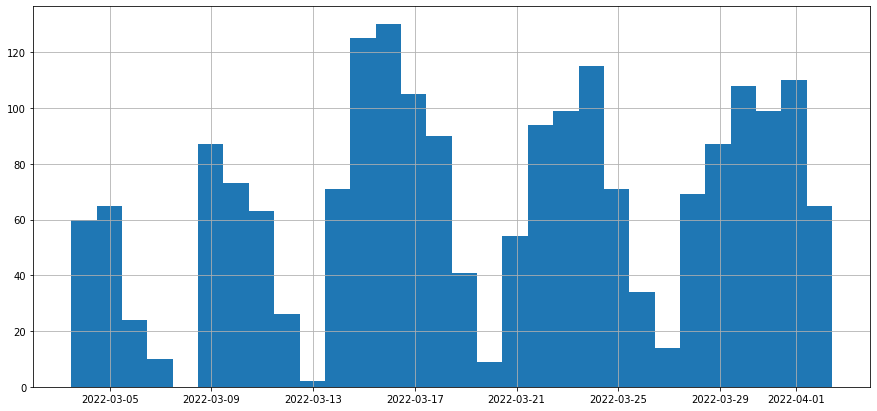

In [11]:
# график по датам
hist = all_vacancy_results['created_at'].hist(bins=30, figsize = (15,7))

<AxesSubplot:>

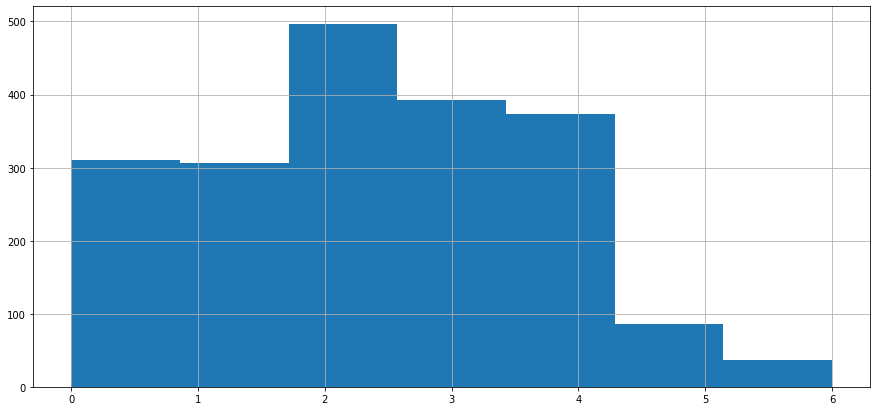

In [12]:
# дни недели
all_vacancy_results['created_weekday'] = all_vacancy_results['created_at'].dt.dayofweek

all_vacancy_results['created_weekday'].hist(bins=7, figsize = (15,7))

In [13]:
# интересные вакансии
interesting = all_vacancy_results[all_vacancy_results['key_skills'].astype(str).str.contains("Python") 
                    & all_vacancy_results['name'].astype(str).str.contains("Аналитик")]

In [15]:
#навыки в интересных вакансиях
interesting.key_skills

0    [{'name': 'Hadoop'}, {'name': 'Python'}, {'nam...
0    [{'name': 'Python'}, {'name': 'Atlassian Confl...
Name: key_skills, dtype: object

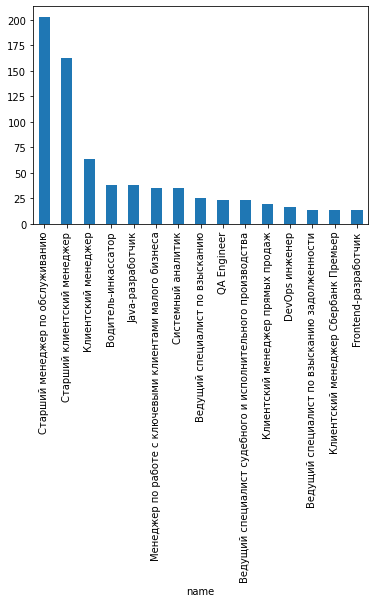

In [43]:
#график наиболее востребованных вакансий
hist_popular = all_vacancy_results.groupby('name')['name'].agg('count').sort_values(ascending=False).head(15).plot.bar(x='lab', y='val', rot=90)